✅ Available devices: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Mounted at /content/drive
✅ Number of classes: 2
Classes: ['test', 'train']
Found 72305 images belonging to 2 classes.
Found 18075 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 88s 71ms/step - accuracy: 0.7459 - loss: 0.5821 - val_accuracy: 0.7417 - val_loss: 0.5988
Epoch 2/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 75s 66ms/step - accuracy: 0.7819 - loss: 0.4672 - val_accuracy: 0.6960 - val_loss: 0.7626
Epoch 3/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 65s 57ms/step - accuracy: 0.8454 - loss: 0.3464 - val_accuracy: 0.7034 - val_loss: 1.1205
Epoch 4/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 89s 63ms/step - accuracy: 0.8792 - loss: 0.2820 - val_accuracy: 0.6776 - val_loss: 1.2404
Epoch 5/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 70s 62ms/step - accuracy: 0.8971 - loss: 0.2403 - val_accuracy: 0.6891 - val_loss: 1.4480
Epoch 6/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 70s 62ms/step - accuracy: 0.9100 - loss: 0.2184 - val_accuracy: 0.6941 - val_loss: 1.5443
Epoch 7/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 66s 58ms/step - accuracy: 0.9139 - loss: 0.2020 - val_accuracy: 0.7022 - val_loss: 1.7270
Epoch 8/20
1130/1130 ━━━━━━━━━━━━━━━━━━━━ 65s 58ms/step - accuracy: 0.9227 -


Classification Report:
              precision    recall  f1-score   support

        test       0.25      0.13      0.17      4537
       train       0.75      0.87      0.81     13538

    accuracy                           0.69     18075
   macro avg       0.50      0.50      0.49     18075
weighted avg       0.62      0.69      0.65     18075

✅ Model saved as fruit_cnn_model.h5


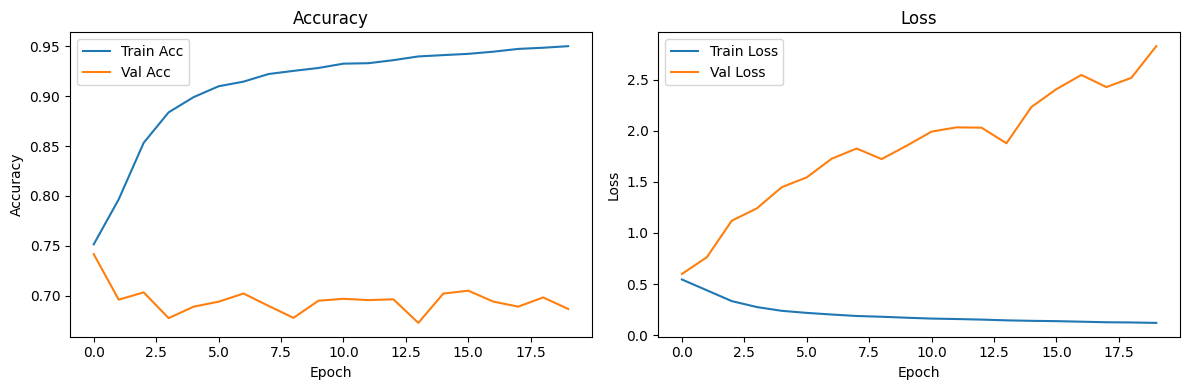

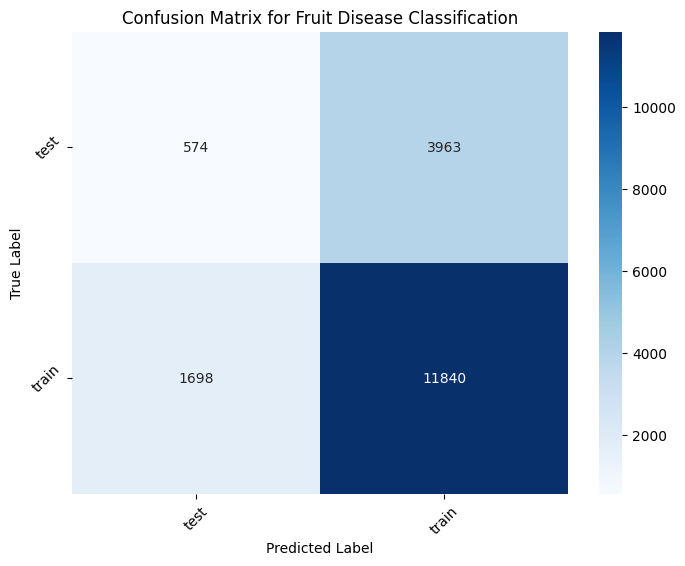

In [2]:
# STEP 1: Install required packages
!pip install tensorflow tqdm scikit-learn matplotlib --quiet

# STEP 2: Import libraries
import os
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from google.colab import drive
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Check for GPU
print("✅ Available devices:", tf.config.list_physical_devices('GPU'))

# STEP 3: Mount Google Drive and define paths
drive.mount('/content/drive')

zip_path = '/content/drive/MyDrive/Colab Notebooks/CVAI/Fruit-Image.zip'
extracted_path_drive = '/content/fruit_data_drive'
extracted_path_local = '/content/fruit_data_local'

# Unzip only if not already done
if not os.path.exists(extracted_path_drive):
    os.makedirs(extracted_path_drive, exist_ok=True)
    import zipfile
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_path_drive)

# Copy to local path for faster access
if not os.path.exists(extracted_path_local):
    shutil.copytree(extracted_path_drive, extracted_path_local)

dataset_path = extracted_path_local
image_size = 128  # Reduced size for speed
input_shape = (image_size, image_size, 3)
batch_size = 64  # Increased batch size

# Auto-detect number of classes
num_classes = len(os.listdir(dataset_path))
print(f"✅ Number of classes: {num_classes}")
print(f"Classes: {os.listdir(dataset_path)}")

# STEP 4: Create train and validation generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

# STEP 5: Build your CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# STEP 6: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# STEP 7: Train the model
epochs = 20
history = model.fit(train_generator, epochs=epochs, validation_data=val_generator)

# STEP 8: Evaluate model
loss, acc = model.evaluate(val_generator, verbose=0)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")

# STEP 9: Classification report
val_generator.reset()
preds = model.predict(val_generator, verbose=0)
y_pred = preds.argmax(axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_labels))

# STEP 10: Save model
model.save('/content/fruit_cnn_model.h5')
print("✅ Model saved as fruit_cnn_model.h5")

# STEP 11: Plot accuracy/loss curves
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Fruit Disease Classification')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()